# Nelder Mead method – 8 points

Implement Nelder-Mead method for the Mishra’s Bird function
$f(x; y) = sin(y)e^{(1-cos(x))^2}+ cos(x)e^{(1-sin(y))^2}+ (x - y)^2$
subjected to, $(x + 5)^2 + (y + 5)^2 < 25$

In [393]:
alpha = 1
beta = 0.5
gamma = 2
delta = 0.5

In [394]:
x0=np.array([-3,-1], dtype = float)
x1=np.array([-4,-1], dtype = float)
x2=np.array([-3.5,-2], dtype = float)
listt=[]
listt.append([x0[0],x0[1]])
listt.append([x1[0],x1[1]])
listt.append([x2[0],x2[1]])

In [395]:
def func(x,y):
    return np.sin(y)*np.exp(np.square(1-np.cos(x)))+np.cos(x)*np.exp(np.square(1-np.sin(y)))+np.square(x-y)

In [396]:
def ordering(a,b,c,d,e,f):
    if func(a,b)<=func(c,d)<=func(e,f):
        return np.array([a,b]), np.array([c,d]), np.array([e,f])
    if func(a,b)<=func(e,f)<=func(c,d):
        return np.array([a,b]),np.array([e,f]),np.array([c,d])
    else:
        return np.array([e,f]), np.array([a,b]),np.array([c,d])

In [397]:
def centroid(b,d):
    return (b+d)/2

In [398]:
def reflection(c, xh, alpha):
    return c + alpha*(c-xh)

In [399]:
def expansion(c, gamma, xr):
    return c + gamma*(xr-c)

In [400]:
def contraction(c, beta, xh):
    return c + beta*(xh-c)

In [401]:
def shrink(xl, delta, xj):
    return xl + delta * (xj-xl)

In [402]:
c = np.array([0,0], dtype = float)
xr = np.array([0,0], dtype = float)
xe = np.array([0,0], dtype = float)
xc = np.array([0,0], dtype = float)
xj = np.array([0,0], dtype = float)

In [403]:
xl, xs, xh = ordering (x0[0],x0[1],x1[0],x1[1],x2[0],x2[1])
while True:
    c[0] = centroid(xs[0],xl[0])
    c[1] = centroid(xs[1],xl[1])
    xr = reflection(c, xh, alpha)
    if func(xs[0],xs[1])>=func(xr[0],xr[1])>=func(xl[0],xl[1]):
        xh = xr
    elif func(xr[0],xr[1])<=func(xl[0],xl[1]):
        xe[0] = expansion(c[0], gamma, xr[0])
        xe[1] = expansion(c[1], gamma, xr[1])
        if func(xe[0],xe[1])<=func(xr[0],xr[1]):
            xh = xe
        else:
            xh = xr
    elif func(xs[0],xs[1])<=func(xr[0],xr[1]):
        xc[0] = contraction(c[0], beta, xh[0])
        xc[1] = contraction(c[1], beta, xh[1])
        if func(xc[0],xc[1])<=func(xh[0],xh[1]):
            xh = xc
    xl, xs, xh = ordering (xh[0],xh[1],xs[0],xs[1],xl[0],xl[1])
    listt.append([xh[0],xh[1]])
    listt.append([xs[0],xs[1]])
    listt.append([xl[0],xl[1]])
    xh[0] = shrink(xl[0], delta, xh[0])
    xh[1] = shrink(xl[1], delta, xh[1])
    xs[0] = shrink(xl[0], delta, xs[0])
    xs[1] = shrink(xl[1], delta, xs[1])
    listt.append([xh[0],xh[1]])
    listt.append([xs[0],xs[1]])
    listt.append([xl[0],xl[1]])
    if abs((func(xl[0],xl[1])-func(xs[0],xs[1])))<0.00001:
        break

### Optimal point and solution

In [404]:
print("x=",xl[0])
print("y=",xl[1])
print("Optimal solution =",func(xl[0],xl[1]))

x= -3.1181273069774305
y= -1.5766519728970263
Optimal solution = -106.7403590951744


## 1. To illustrate the behavior of the methods plot simplex (triangle) for every iteration.

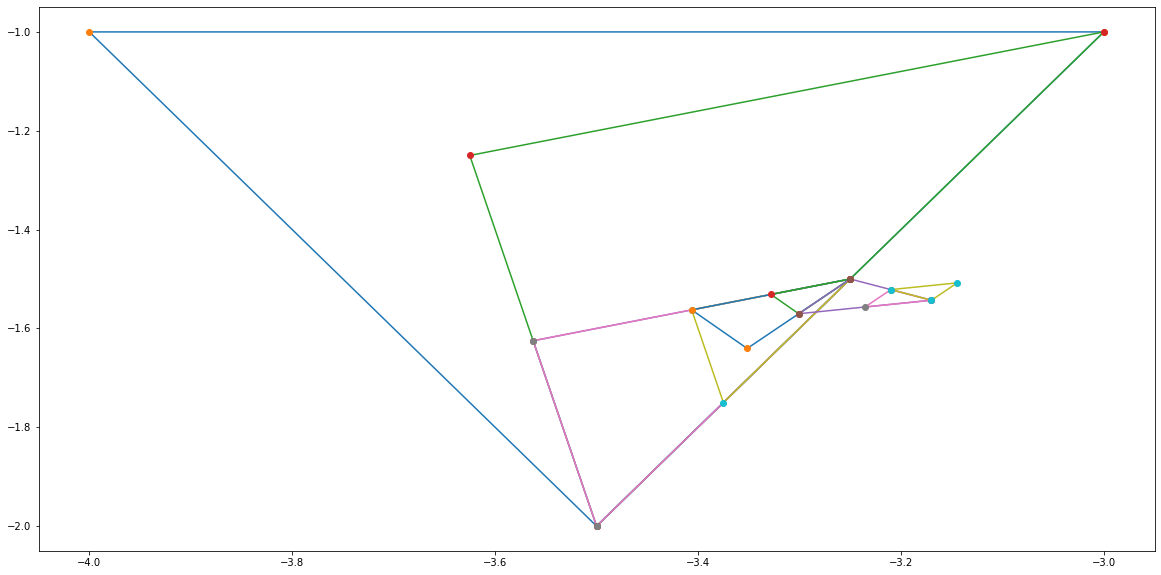

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
plt.figure(figsize=(20,10))
xy = np.array(listt)

triang = mtri.Triangulation(xy[:3,0], xy[:3,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[3:6,0], xy[3:6,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[6:9,0], xy[6:9,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[9:12,0], xy[9:12,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[12:15,0], xy[12:15,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[15:18,0], xy[15:18,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[18:21,0], xy[18:21,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[21:24,0], xy[21:24,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[24:27,0], xy[24:27,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[27:30,0], xy[27:30,1])
plt.triplot(triang, marker="o")

plt.show()

## 2. Demonstrate that the algorithm may converge to different points depending on the starting point. Report explicitly two distinct starting points $x^0$ and the corresponding $x$*

In [406]:
x0=np.array([-8,-1], dtype = float)
x1=np.array([-9,-1], dtype = float)
x2=np.array([-8.5,-2], dtype = float)
listt=[]
listt.append([x0[0],x0[1]])
listt.append([x1[0],x1[1]])
listt.append([x2[0],x2[1]])

In [407]:
c = np.array([0,0], dtype = float)
xr = np.array([0,0], dtype = float)
xe = np.array([0,0], dtype = float)
xc = np.array([0,0], dtype = float)
xj = np.array([0,0], dtype = float)

In [408]:
xl, xs, xh = ordering (x0[0],x0[1],x1[0],x1[1],x2[0],x2[1])
while True:
    c[0] = centroid(xs[0],xl[0])
    c[1] = centroid(xs[1],xl[1])
    xr = reflection(c, xh, alpha)
    if func(xs[0],xs[1])>=func(xr[0],xr[1])>=func(xl[0],xl[1]):
        xh = xr
    elif func(xr[0],xr[1])<=func(xl[0],xl[1]):
        xe[0] = expansion(c[0], gamma, xr[0])
        xe[1] = expansion(c[1], gamma, xr[1])
        if func(xe[0],xe[1])<=func(xr[0],xr[1]):
            xh = xe
        else:
            xh = xr
    elif func(xs[0],xs[1])<=func(xr[0],xr[1]):
        xc[0] = contraction(c[0], beta, xh[0])
        xc[1] = contraction(c[1], beta, xh[1])
        if func(xc[0],xc[1])<=func(xh[0],xh[1]):
            xh = xc
    xl, xs, xh = ordering (xh[0],xh[1],xs[0],xs[1],xl[0],xl[1])
    listt.append([xh[0],xh[1]])
    listt.append([xs[0],xs[1]])
    listt.append([xl[0],xl[1]])
    xh[0] = shrink(xl[0], delta, xh[0])
    xh[1] = shrink(xl[1], delta, xh[1])
    xs[0] = shrink(xl[0], delta, xs[0])
    xs[1] = shrink(xl[1], delta, xs[1])
    listt.append([xh[0],xh[1]])
    listt.append([xs[0],xs[1]])
    listt.append([xl[0],xl[1]])
    if abs((func(xl[0],xl[1])-func(xs[0],xs[1])))<0.00001:
        break

### Optimal point and solution

In [409]:
print("x=",xl[0])
print("y=",xl[1])
print("Optimal solution =",func(xl[0],xl[1]))

x= -9.36767578125
y= -1.6279296875
Optimal solution = -48.406020679176535


### Our objective function has a lot of local minimums. So, we know from lecture that Nelder mead algorithm optimizes the function to local minimum.

## 3. Examine the behavior of the method for various parameters $\alpha$, $\beta$, $\gamma$. For one chosen $x^0$ show that the method may converge to different points. Report parameter values and $x$*.

In [410]:
alpha = 2
beta = 0.1
gamma = 3
delta = 0.5

In [411]:
x0=np.array([-3,-1], dtype = float)
x1=np.array([-4,-1], dtype = float)
x2=np.array([-3.5,-2], dtype = float)
listt=[]
listt.append([x0[0],x0[1]])
listt.append([x1[0],x1[1]])
listt.append([x2[0],x2[1]])

In [412]:
c = np.array([0,0], dtype = float)
xr = np.array([0,0], dtype = float)
xe = np.array([0,0], dtype = float)
xc = np.array([0,0], dtype = float)
xj = np.array([0,0], dtype = float)

In [413]:
xl, xs, xh = ordering (x0[0],x0[1],x1[0],x1[1],x2[0],x2[1])
while True:
    c[0] = centroid(xs[0],xl[0])
    c[1] = centroid(xs[1],xl[1])
    xr = reflection(c, xh, alpha)
    if func(xs[0],xs[1])>=func(xr[0],xr[1])>=func(xl[0],xl[1]):
        xh = xr
    elif func(xr[0],xr[1])<=func(xl[0],xl[1]):
        xe[0] = expansion(c[0], gamma, xr[0])
        xe[1] = expansion(c[1], gamma, xr[1])
        if func(xe[0],xe[1])<=func(xr[0],xr[1]):
            xh = xe
        else:
            xh = xr
    elif func(xs[0],xs[1])<=func(xr[0],xr[1]):
        xc[0] = contraction(c[0], beta, xh[0])
        xc[1] = contraction(c[1], beta, xh[1])
        if func(xc[0],xc[1])<=func(xh[0],xh[1]):
            xh = xc
    xl, xs, xh = ordering (xh[0],xh[1],xs[0],xs[1],xl[0],xl[1])
    listt.append([xh[0],xh[1]])
    listt.append([xs[0],xs[1]])
    listt.append([xl[0],xl[1]])
    xh[0] = shrink(xl[0], delta, xh[0])
    xh[1] = shrink(xl[1], delta, xh[1])
    xs[0] = shrink(xl[0], delta, xs[0])
    xs[1] = shrink(xl[1], delta, xs[1])
    listt.append([xh[0],xh[1]])
    listt.append([xs[0],xs[1]])
    listt.append([xl[0],xl[1]])
    if abs((func(xl[0],xl[1])-func(xs[0],xs[1])))<0.00001:
        break

In [414]:
print("x=",xl[0])
print("y=",xl[1])
print("Optimal solution =",func(xl[0],xl[1]))

x= -3.2154375475953527
y= -1.4669684554375353
Optimal solution = -103.94915812040968


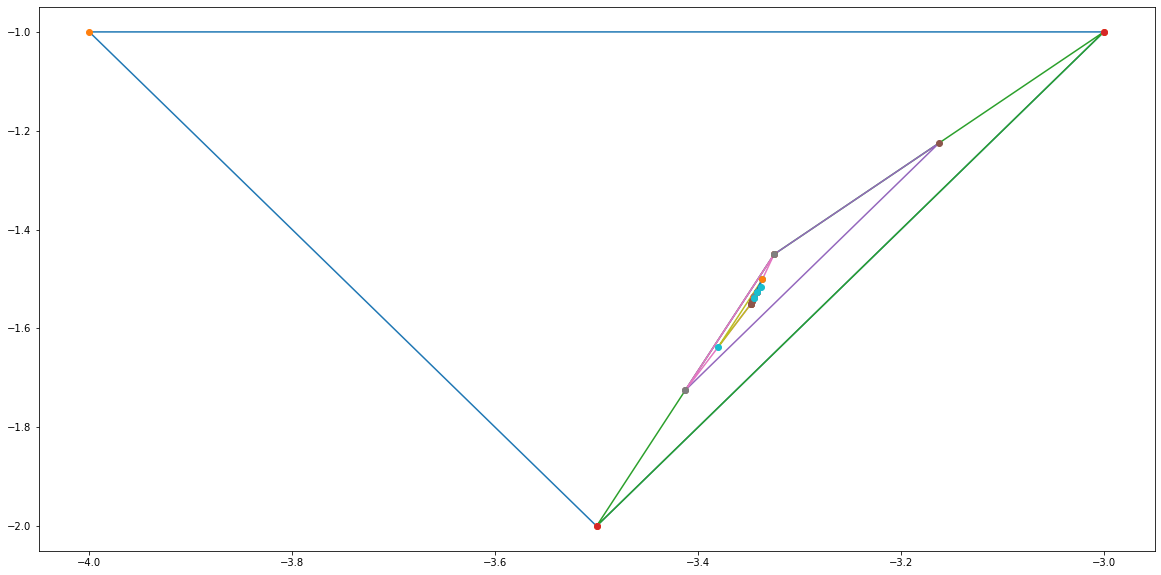

In [415]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
plt.figure(figsize=(20,10))
xy = np.array(listt)

triang = mtri.Triangulation(xy[:3,0], xy[:3,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[3:6,0], xy[3:6,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[6:9,0], xy[6:9,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[9:12,0], xy[9:12,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[12:15,0], xy[12:15,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[15:18,0], xy[15:18,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[18:21,0], xy[18:21,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[21:24,0], xy[21:24,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[24:27,0], xy[24:27,1])
plt.triplot(triang, marker="o")
triang = mtri.Triangulation(xy[27:30,0], xy[27:30,1])
plt.triplot(triang, marker="o")

plt.show()

## How we see, our result also depends on  $\alpha$, $\beta$, $\gamma$. Because they are parameters of operations such like reflection, contraction, expansion and shrink. Therefore these parameters influence on every iteration.